# Global Retail Sales Data Analysis Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

file_path = "\Portfolio\global_retail_sales.csv"
df = pd.read_csv(file_path)

In [2]:
# Let's look at the data
df.head(10)

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
5,199680,2024-06-01,BF1546,Clothing,Male,29,Sydney,Yes,118,100,218,1,218,1,The product had an underwhelming design.
6,130929,2024-03-06,BF1547,Ornaments,Male,32,Memphis,No,32,0,32,3,96,4,Premium quality as usual.
7,164427,2024-04-16,BF1547,Ornaments,Male,26,Miami,No,32,0,32,2,64,3,Not as expected.
8,149510,2024-05-22,BF1545,Other,Female,26,New York,No,10,0,10,1,10,4,Lack of delivery delays is greatly appreciated.
9,176280,2024-02-27,BF1548,Clothing,Male,20,Sydney,Yes,65,100,165,1,165,4,Great design is one of the major positives of ...


In [3]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%M-%d')

In [4]:
# Check for missing values
df.isnull().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

In [5]:
# Drop any duplicates
df.duplicated().sum()

0

In [6]:
# General informantion about each column datatype and dataset shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                7394 non-null   int64         
 1   Order Date              7394 non-null   datetime64[ns]
 2   Product ID              7394 non-null   object        
 3   Product Category        7394 non-null   object        
 4   Buyer Gender            7394 non-null   object        
 5   Buyer Age               7394 non-null   int64         
 6   Order Location          7394 non-null   object        
 7   International Shipping  7394 non-null   object        
 8   Sales Price             7394 non-null   int64         
 9   Shipping Charges        7394 non-null   int64         
 10  Sales per Unit          7394 non-null   int64         
 11  Quantity                7394 non-null   int64         
 12  Total Sales             7394 non-null   int64   

(7394, 15)

In [7]:
# Descriptive statistics for numerical columns
df.describe()

,Order ID,Order Date,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159735.134028,2023-11-20 02:49:13.648904448,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
min,120005.000000,2023-01-01 00:12:00,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,2024-01-04 00:03:00,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159577.500000,2024-01-13 00:04:00,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,2024-01-22 00:08:00,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,2024-01-31 00:10:00,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000
std,23040.247194,NaN,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731


# Distribution of Total Sales:

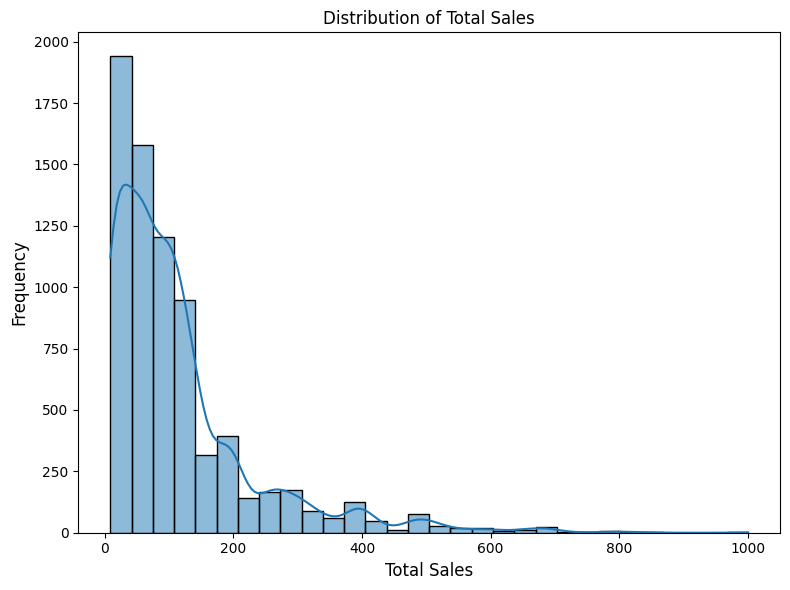

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total Sales'], bins=30, kde=True)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Sales')
plt.tight_layout()
plt.show()

The majority of total sales occur at lower values.

There are few instances of high total sales, indicating some outliers or exceptional sales events.

# Count of buyers by gender:

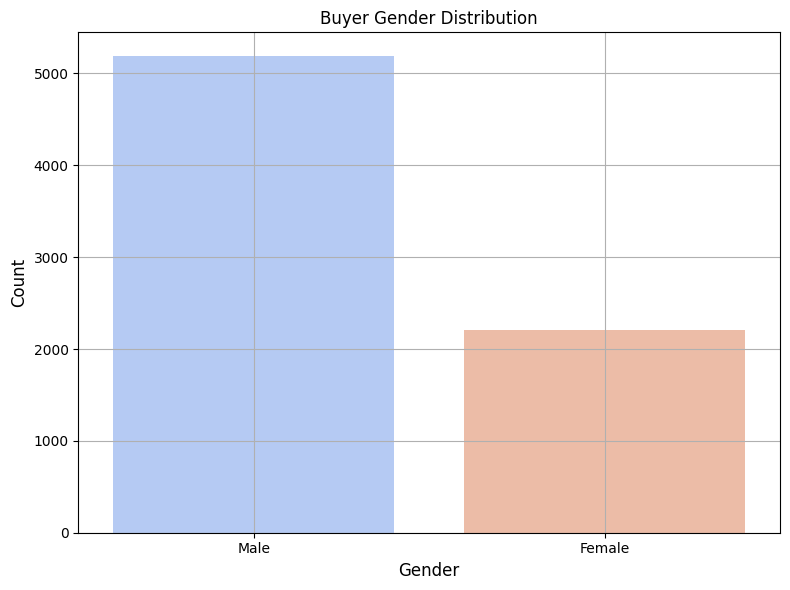

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='Buyer Gender', data=df, palette='coolwarm')
plt.title('Buyer Gender Distribution')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()

Male buyers dominate the dataset, which may imply gender-specific purchasing patterns.

# The summary of Total Sales for each product category:

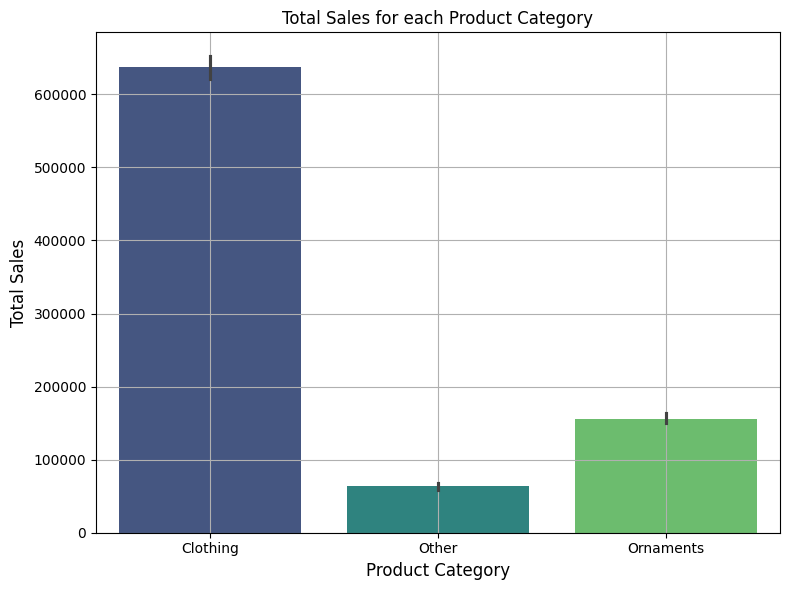

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x='Product Category', y='Total Sales', data=df, estimator=sum, palette='viridis')
plt.title('Total Sales for each Product Category')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()

Clothing is the most popular or profitable category in terms of total sales.

Investments or promotions in "Clothing" could yield higher returns.

Opportunities exist to improve sales in "Other" and "Ornaments" categories.

# Average rating for each product category:

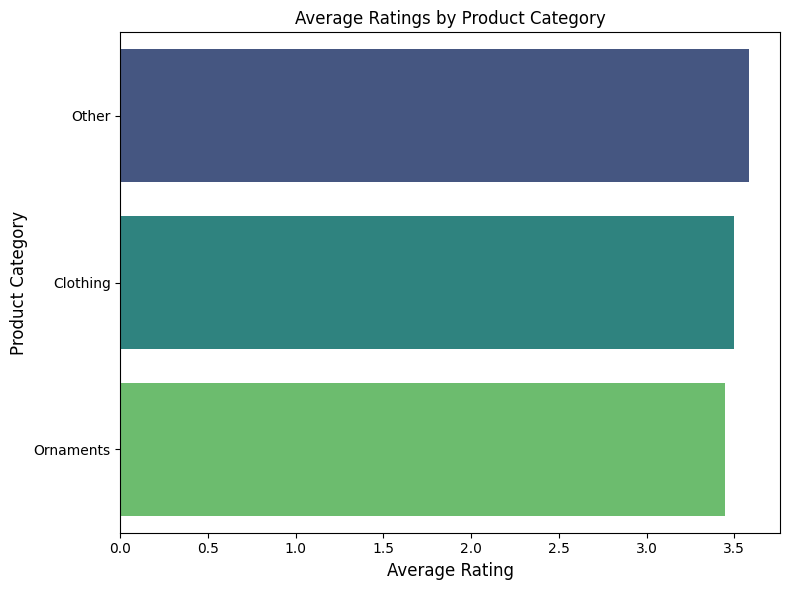

In [15]:
ratings_by_category = df.groupby('Product Category')['Rating'].mean().reset_index()

ratings_by_category = ratings_by_category.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=ratings_by_category, x='Rating', y='Product Category', palette='viridis')
plt.title('Average Ratings by Product Category')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

Ornaments have the highest average rating, indicating they might be the most well-received products in terms of customer satisfaction.

Clothing has a slightly lower average rating but is still comparable to Ornaments.

Other products have the lowest average rating, suggesting potential areas of improvement in product quality or customer experience.

# Count of orders with/without international shipping:

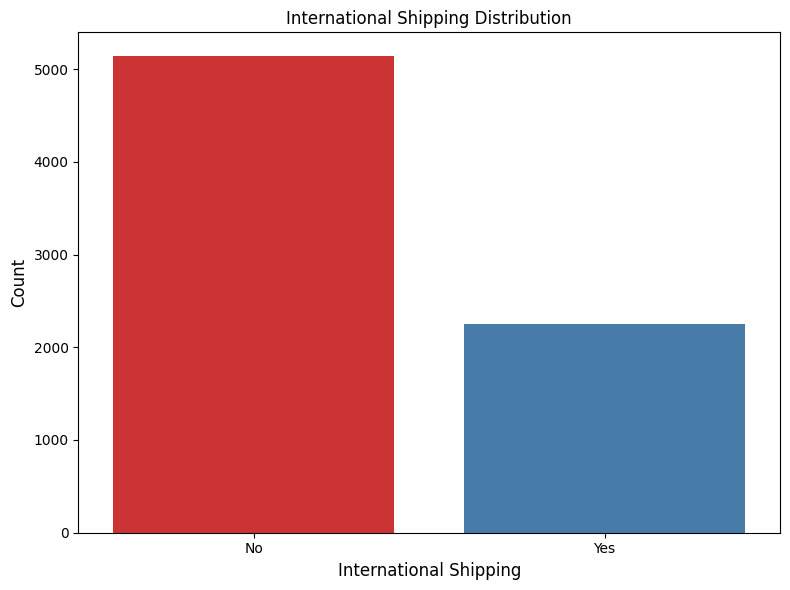

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International Shipping', data=df, palette='Set1')
plt.title('International Shipping Distribution')
plt.xlabel('International Shipping', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The majority of orders do not have international shipping enabled, as indicated by the significantly higher count for "No"

A smaller, yet notable, portion of customers opt for international shipping.

# Count of orders across different locations:

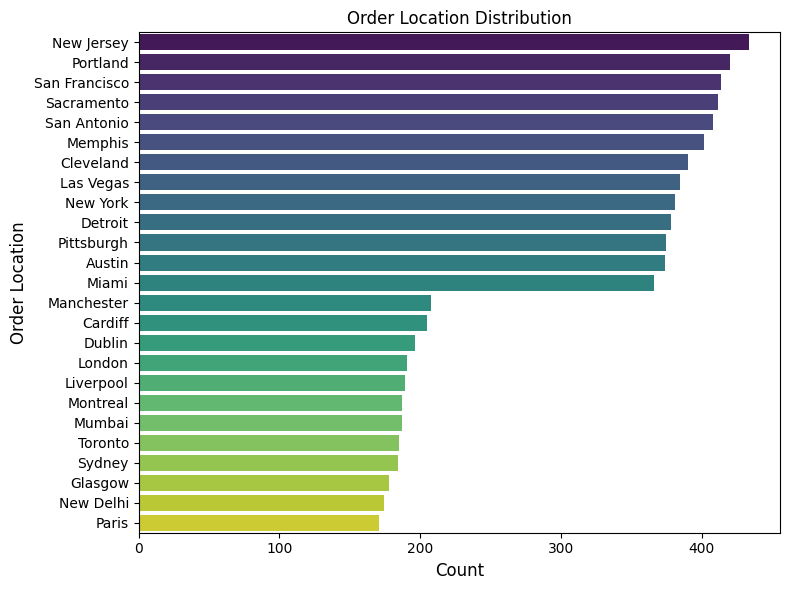

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Order Location', data=df, order=df['Order Location'].value_counts().index, palette='viridis')
plt.title('Order Location Distribution')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Order Location', fontsize=12)
plt.tight_layout()
plt.show()

New Jersey, Portland, and San Francisco are the top three locations with the highest order counts, indicating strong customer bases in these areas.

Locations like Paris and New Delhi have the lowest order counts, reflecting either lower market penetration or demand.

# Correlation Heatmap of Numerical Features

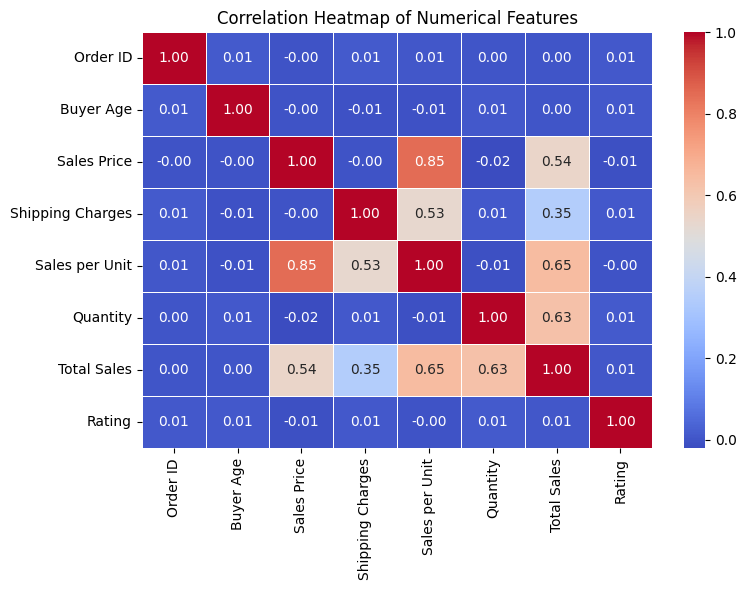

In [14]:
numerical_data = df.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


High Correlations:

Sales Price vs. Sales per Unit (0.85):

Strong positive correlation indicates that as the sales price increases, the sales per unit also tend to increase. This could suggest that high-priced items are sold in a manner 
consistent with their unit pricing.

Sales per Unit vs. Total Sales (0.65):

This positive correlation highlights that higher sales per unit contribute significantly to the total sales.

Quantity vs. Total Sales (0.63):

A moderately strong positive correlation shows that selling larger quantities drives higher total sales, which is expected.